In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
%matplotlib inline

# The Data

I have chosen to use the NFL data for this project. I believe I can make many visualizations both between overall trends in the NFL and on specific team trends. 

In [2]:
data = pd.read_csv('nfl_games.csv', parse_dates=[0])
data.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Data columns (total 12 columns):
date         16274 non-null datetime64[ns]
season       16274 non-null int64
neutral      16274 non-null int64
playoff      16274 non-null int64
team1        16274 non-null object
team2        16274 non-null object
elo1         16274 non-null float64
elo2         16274 non-null float64
elo_prob1    16274 non-null float64
score1       16274 non-null int64
score2       16274 non-null int64
result1      16274 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1.5+ MB


# Establish Additional Value

2 ways I can see modifying this data set to create visualizations and additional value are:

1- Gather the average score difference per season to see if this has increased or decreased over time. By looking only at average difference per season, most outliars should be smoothed out and users will be able to see overall trends in the data.

2- Look at statistics for a spefic team, either over time or for a specific season and look for improvement. By zooming in on only the statistics for a specific team, one would be able to see how that team has been/ is performing.

First, lets see if teams have gotten more or less even over time. I will do this by first creating a "difference" column where I store the difference in score between the winning and losing team. I want the absolute value of the difference because I only want to see if this number is growing. Next I will graph this difference over time to see if there is any pattern.

In [4]:
data['Difference'] = data.apply(lambda row: abs(row.score1 - 
                                  row.score2), axis = 1)
data.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Difference
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0,48
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0,43
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0,10
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0,14
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0,45


I am now going to make separate data frames from the Chiefs and the Patriots home games. It appears that team1 in the data frame indicates the home team in the matchup.

In [5]:
patriots = data.loc[data['team1'] == 'NE']
patriots.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Difference
2903,1960-09-09,1960,0,0,NE,DEN,1300.000,1300.000,0.592466,10,13,0.0,3
2911,1960-09-23,1960,0,0,NE,BUF,1305.064,1253.579,0.661624,0,13,0.0,13
2959,1960-10-28,1960,0,0,NE,LAC,1274.033,1280.103,0.584003,16,45,0.0,29
2968,1960-11-04,1960,0,0,NE,OAK,1233.213,1246.477,0.573909,34,28,1.0,6
2978,1960-11-11,1960,0,0,NE,NYJ,1249.415,1263.521,0.572723,38,21,1.0,17


In [6]:
chiefs = data.loc[data['team1'] == 'KC']
chiefs.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,Difference
2915,1960-09-25,1960,0,0,KC,LAC,1327.601,1288.522,0.645457,17,0,1.0,17
2927,1960-10-02,1960,0,0,KC,NYJ,1347.170,1317.970,0.632338,35,37,0.0,2
2931,1960-10-09,1960,0,0,KC,OAK,1332.655,1227.786,0.726680,19,20,0.0,1
2982,1960-11-13,1960,0,0,KC,DEN,1353.986,1283.364,0.685832,34,7,1.0,27
3014,1960-12-04,1960,0,0,KC,TEN,1314.500,1440.773,0.412724,24,0,1.0,24


# Visualizations

First I will plot the average differences per game throughout NFL history, with a line of best fit so a user can see any basic trend in the data.

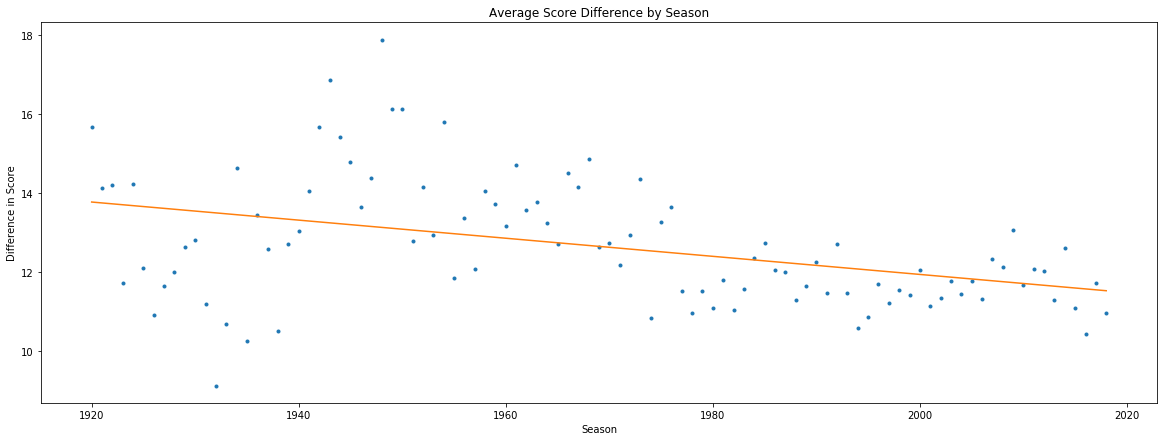

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Group by season to find average difference per season
data = data.sort_values('date', ascending=True)
avg_season = data[['season', 'Difference']].groupby(['season']).mean()

#Plot difference vs season
plt.figure(figsize=(20,7))
plt.ylabel('Difference in Score')
plt.xlabel('Season')
plt.title('Average Score Difference by Season')
plt.plot(avg_season.index, avg_season['Difference'], '.')

#Plot line of best fit to see trend
x = avg_season.index
y = avg_season['Difference']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))



From this plot we can see that there is a relatively clear trend, teams are becoming more even in the NFL. This could be for a number of reasons, including better scouting/ access to player statistics or the NFL attempting to make their teams more even to increase viewership, close games are always more exciting to watch! This displays story telling because viewers can see how when the NFL was created, many games were lopsided by amazing teams that crushed all of their opponents. As technology and scouting became better, the worst teams got to draft the accurately-chosen best players in each college class, which helped to even out the teams.

I will now plot the win % of the Patriots since their creation.

In [8]:
patriots_win_ratio = patriots[['season', 'result1']].groupby(['season']).mean()
chiefs_win_ratio = chiefs[['season', 'result1']].groupby(['season']).mean()
patriots_win_ratio.head()

,result1
season,
1960,0.428571
1961,0.642857
1962,0.857143
1963,0.785714
1964,0.642857


In [9]:
chiefs_win_ratio.head()

,result1
season,
1960,0.714286
1961,0.571429
1962,0.857143
1963,0.571429
1964,0.571429


In [10]:
patriots_win_ratio.insert(0, 'Season', list(map(lambda x: format(x%100, "02d"), range(60, ((60 + len(patriots_win_ratio)%100))))))
patriots_win_ratio = patriots_win_ratio.rename(columns={"result1": "win ratio"})
patriots_win_ratio.head()

,Season,win ratio
season,,
1960,60,0.428571
1961,61,0.642857
1962,62,0.857143
1963,63,0.785714
1964,64,0.642857


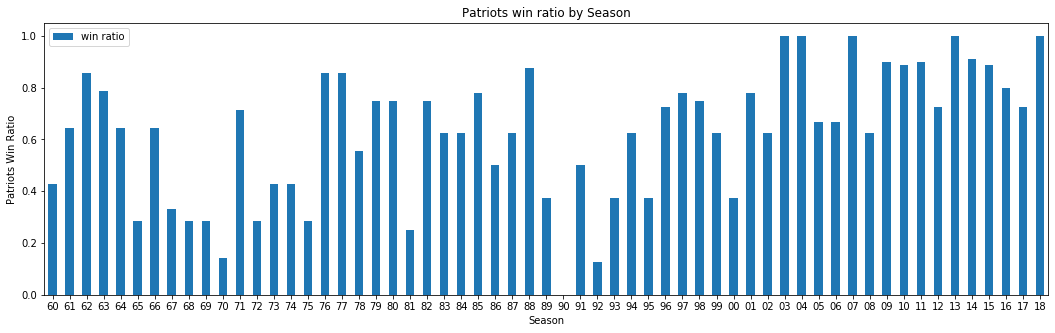

In [11]:
ax = patriots_win_ratio.plot.bar(x='Season', y='win ratio', rot=0, figsize=(18,5), title = 'Patriots win ratio by Season')
plt.ylabel('Patriots Win Ratio');

By zooming in on only 1 team, the Patriots, one can see that they appear to have an overall increase in win ratio since 1990. While their first 10 years varied widely, almost every year since 1990 has had a win ratio >50%.

I will make a similar chart depicting the Chiefs.

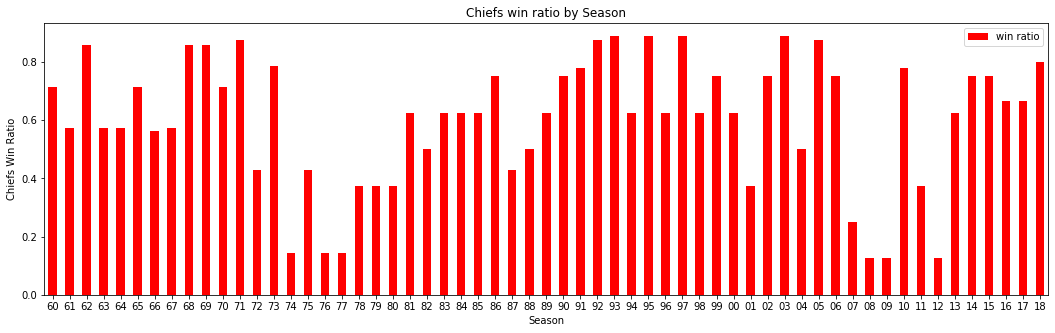

In [12]:
chiefs_win_ratio.insert(0, 'Season', list(map(lambda x: format(x%100, "02d"), range(60, ((60 + len(chiefs_win_ratio)%100))))))
chiefs_win_ratio = chiefs_win_ratio.rename(columns={"result1": "win ratio"})
chart = chiefs_win_ratio.plot.bar(x='Season', y='win ratio', rot=0, figsize=(18,5), title = 'Chiefs win ratio by Season', color=(1, 0.0, 0.0, 1))
plt.ylabel('Chiefs Win Ratio');

Showing this same plot for the Chiefs gives us different information. One can see that the Chiefs struggled from 2007-2012. In 2013 the Chiefs signed Alex Smith and immediately their win percentage jumped to over 50%. This chart displays story telling because it is clear when the Chiefs signed their new Quarterback. 

I will now create a grouped boxplot to show the difference in average score over the past 5 seasons between the Chiefs and the Patriots.

In [13]:
#Chiefs & Patriots Season data
PP = data.loc[((data['team1'] == 'NE') | (data['team1'] == 'KC'))  & (data['season'] >= 2013)]
PP = PP.rename(columns={"score1": "Score"})
PP.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,Score,score2,result1,Difference
14688,2013-09-12,2013,0,0,NE,NYJ,1641.780,1438.095,0.824433,13,10,1.0,3
14701,2013-09-15,2013,0,0,KC,DAL,1393.945,1506.335,0.432220,17,16,1.0,1
14716,2013-09-22,2013,0,0,NE,TB,1646.118,1453.243,0.815243,23,3,1.0,20
14724,2013-09-29,2013,0,0,KC,NYG,1432.527,1489.450,0.511622,31,7,1.0,24
14761,2013-10-13,2013,0,0,KC,OAK,1495.679,1403.707,0.711689,24,7,1.0,17


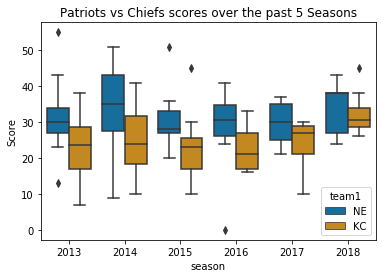

In [15]:
sns.boxplot(y='Score', x='season', 
                 data=PP, 
                 palette="colorblind",
                 hue='team1',
           ).set_title('Patriots vs Chiefs scores over the past 5 Seasons');

This Seaborn box plot shows the score ranges for the Chiefs and Patriots over the past 5 seasons. As you can see, the patriots have an average score higher than the Chiefs in all 5 seasons.

# Conclusion

Visualizations help to show data in new ways so that specific peices of information can be gained from them.

First, I showed how games in the NFL are getting closer every season as the worst teams have access to better technology and recruiting tools to ensure that they get the best new players in the draft.

Second, I showed how bargraphs can be used to see specific events, and how those events made an impact on some value. The Chiefs were struggling to win games before the hired Alex Smith as their new quarterback. Without knowing what season he was drafted, one can simply look at the bar chart and know exactly when this was (2013).

Third and finally, I narrowed my data down to just 2 teams, the Chiefs and the Patriots, so that they could be compared side by side over the past 5 seasons. By created box plots of all the scores each team had over the past 5 seasons, one can see that the Patriots have averaged higher scores per game in all 5 of the last 5 seasons. 